In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
url1 = "https://www.tripadvisor.in/Hotel_Review-g304554-d299754-Reviews-or"
url2 = "-JW_Marriott_Mumbai_Juhu-Mumbai_Maharashtra.html&sortBy=RECENCY&vsrc=rcnt#defRevPDP"
reviews=[]
ratings = []
title = []
date = []
for i in range(0,3000,5):
    if i == 0:
        base_url = url1+url2
    else:
        base_url = url1+"-or"+str(i)+url2
    response = requests.get(base_url)
    soup = bs(response.content,"html.parser")
      # scrap reviews
    temp = soup.findAll("q",attrs={"class","IRsGHoPm"})
    for j in range(len(temp)):
        reviews.append(str(j)+" "+temp[j].text) 
            # scrap ratings
    for a in soup.findAll("div",attrs={"class","nf9vGX55"}):
        for rate in a.findAll("span"):
            ratings.append(rate)
               # scrap date of review
    for b in soup.findAll("div",attrs={"class","_2fxQ4TOx"}):
        date.append(b.text)

In [7]:
#ratings[:4]
ratings

[<span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_10"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_10"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_10"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating 

In [3]:
int(str(ratings[0])[37:-10])

5

In [4]:
rate = ratings[:10]

In [5]:
rate

[<span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_10"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_50"></span>,
 <span class="ui_bubble_rating bubble_10"></span>]

In [8]:
# define functions for mapping to clean data

def get_rate(arr):
    return int(str(arr)[37:-10])

def get_date(arr):
    return str(arr)[15:]

def get_review(arr):
    return arr[2:]

In [9]:
rates_in_int = map(get_rate, ratings)

In [10]:
ratings = []
for i in rates_in_int:
    ratings.append(i)

In [11]:
ratings[:10]

[5, 5, 5, 5, 1, 5, 5, 5, 5, 1]

In [12]:
review_date = map(get_date, date)
date=[]
for i in review_date:
    date.append(i)

In [13]:
rev = map(get_review, reviews)
reviews = []
for i in rev:
    reviews.append(i)
    
reviews

['JW Marriott or Marriott is always the best choice. We had a Birthday celebration and they upgraded our room to the best one. Staff is always courteous. It’s all their training. Breakfast is good but lunch and dinner are better. We are Marriott members since a long time and we will always continue to choose this brand for our stay. Cheers',
 'Its expensive but they take good care of you. Rooms are cleaned everyday and the staff is warm and welcoming . My stay was great and everything seemed to be focussed on customer satisfaction and luxury. Will visit again.',
 'For a short stay, JWM Juhu offered a great city retreat. Food, service and room quality exceeded my expectations, but most importantly the warmth of the hotel staff made coming out of lockdown absolutely delightful.',
 "Having locked at home for 8 months, it was time to step out. But being pregnant and traveling with a 6 yr old daughter was a challenge.. Yet we needed a break from all the stressful days managing work and home

In [14]:
len(reviews)

3000

In [15]:
import pandas as pd
#data=[reviewer, reviews, rating, dates], columns=['Reviewer','Review','Ratings','Date']
JwMarriot_Hotel_Reviews = pd.DataFrame({'Review':reviews, 'Ratings':ratings, 'Date':date})

JwMarriot_Hotel_Reviews.head()

JwMarriot_Hotel_Reviews.to_csv(r'JwMarriot_Hotel_Review.csv', index=True)

##  Perform the EDA ###

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
!pip install spacy
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [29]:
import pandas
hotel=pd.read_csv("JwMarriot_Hotel_Review.csv",error_bad_lines=False)

In [30]:
hotel

Unnamed: 0                                             Review  Ratings  \
0              0  JW Marriott or Marriott is always the best cho...        5   
1              1  Its expensive but they take good care of you. ...        5   
2              2  For a short stay, JWM Juhu offered a great cit...        5   
3              3  Having locked at home for 8 months, it was tim...        5   
4              4  The worst service ever for a 5 star hotel they...        1   
...          ...                                                ...      ...   
2995        2995  JW Marriott or Marriott is always the best cho...        5   
2996        2996  Its expensive but they take good care of you. ...        5   
2997        2997  For a short stay, JWM Juhu offered a great cit...        5   
2998        2998  Having locked at home for 8 months, it was tim...        5   
2999        2999  The worst service ever for a 5 star hotel they...        1   

                   Date  
0       eview Yesterday  
1     e a review 18 Dec  
2         review 16 Dec  
3     e a review 15 Dec  
4          eview 14 Dec  
...                 ...  
2995    eview Yesterday  
2996  e a review 18 Dec  
2997      review 16 Dec  
2998  e a review 15 Dec  
2999       eview 14 Dec  

[3000 rows x 4 columns]

In [31]:
type(hotel)

pandas.core.frame.DataFrame

In [33]:
hotel_review=hotel["Review"]

In [35]:
# Joining the list into one string/text
text = ' '.join(hotel_review)
text

"JW Marriott or Marriott is always the best choice. We had a Birthday celebration and they upgraded our room to the best one. Staff is always courteous. It’s all their training. Breakfast is good but lunch and dinner are better. We are Marriott members since a long time and we will always continue to choose this brand for our stay. Cheers Its expensive but they take good care of you. Rooms are cleaned everyday and the staff is warm and welcoming . My stay was great and everything seemed to be focussed on customer satisfaction and luxury. Will visit again. For a short stay, JWM Juhu offered a great city retreat. Food, service and room quality exceeded my expectations, but most importantly the warmth of the hotel staff made coming out of lockdown absolutely delightful. Having locked at home for 8 months, it was time to step out. But being pregnant and traveling with a 6 yr old daughter was a challenge.. Yet we needed a break from all the stressful days managing work and home on our own..

In [36]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'JW Marriott or Marriott is always the best choice We had a Birthday celebration and they upgraded our room to the best one Staff is always courteous It’s all their training Breakfast is good but lunch and dinner are better We are Marriott members since a long time and we will always continue to choose this brand for our stay Cheers Its expensive but they take good care of you Rooms are cleaned everyday and the staff is warm and welcoming  My stay was great and everything seemed to be focussed on customer satisfaction and luxury Will visit again For a short stay JWM Juhu offered a great city retreat Food service and room quality exceeded my expectations but most importantly the warmth of the hotel staff made coming out of lockdown absolutely delightful Having locked at home for 8 months it was time to step out But being pregnant and traveling with a 6 yr old daughter was a challenge Yet we needed a break from all the stressful days managing work and home on our own We didnt want to tra

In [39]:
#Tokenization
#!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ceosh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['JW', 'Marriott', 'or', 'Marriott', 'is', 'always', 'the', 'best', 'choice', 'We', 'had', 'a', 'Birthday', 'celebration', 'and', 'they', 'upgraded', 'our', 'room', 'to', 'the', 'best', 'one', 'Staff', 'is', 'always', 'courteous', 'It', '’', 's', 'all', 'their', 'training', 'Breakfast', 'is', 'good', 'but', 'lunch', 'and', 'dinner', 'are', 'better', 'We', 'are', 'Marriott', 'members', 'since', 'a', 'long', 'time']


In [40]:
len(text_tokens)

333000

In [41]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ceosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ceosh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['JW', 'Marriott', 'Marriott', 'always', 'best', 'choice', 'We', 'Birthday', 'celebration', 'upgraded', 'room', 'best', 'one', 'Staff', 'always', 'courteous', 'It', '’', 'training', 'Breakfast', 'good', 'lunch', 'dinner', 'better', 'We', 'Marriott', 'members', 'since', 'long', 'time', 'always', 'continue', 'choose', 'brand', 'stay', 'Cheers', 'Its', 'expensive', 'take', 'good']


In [42]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['jw', 'marriott', 'marriott', 'always', 'best', 'choice', 'we', 'birthday', 'celebration', 'upgraded', 'room', 'best', 'one', 'staff', 'always', 'courteous', 'it', '’', 'training', 'breakfast', 'good', 'lunch', 'dinner', 'better', 'we']


In [43]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['jw', 'marriott', 'marriott', 'alway', 'best', 'choic', 'we', 'birthday', 'celebr', 'upgrad', 'room', 'best', 'one', 'staff', 'alway', 'courteou', 'it', '’', 'train', 'breakfast', 'good', 'lunch', 'dinner', 'better', 'we', 'marriott', 'member', 'sinc', 'long', 'time', 'alway', 'continu', 'choos', 'brand', 'stay', 'cheer', 'it', 'expens', 'take', 'good']


### Steming has disadvange of removing the end words which result in meaningless words ###

In [47]:
!python -m spacy download en

You do not have sufficient privilege to perform this operation.


  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047114 sha256=46b2aba0d0ad2300f7455e8bb9ba53d675f51eac7dfa8114480d7de9a534dae9
  Stored in directory: C:\Users\ceosh\AppData\Local\Temp\pip-ephem-wheel-cache-bixei_og\wheels\ee\4d\f7\563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\ceosh\.conda\envs\DataScience\lib\site-packages\en_core_web_sm -->
C:\Users\ceosh\.conda\envs\DataScience\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have a

In [58]:
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp.max_length = 1500000

In [59]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

JW Marriott Marriott always best choice We Birthday celebration upgraded room best one Staff always courteous It ’ training Breakfast good lunch dinner better We Marriott members since long time always continue choose brand stay Cheers Its expensive take good


In [60]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['JW', 'Marriott', 'Marriott', 'always', 'good', 'choice', '-PRON-', 'birthday', 'celebration', 'upgraded', 'room', 'good', 'one', 'staff', 'always', 'courteous', '-PRON-', "'", 'train', 'Breakfast', 'good', 'lunch', 'dinner', 'well', '-PRON-']


# Feature Extraction #

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [62]:
print(vectorizer.vocabulary_)

{'jw': 111, 'marriott': 130, 'always': 8, 'good': 89, 'choice': 37, 'pron': 165, 'birthday': 17, 'celebration': 31, 'upgraded': 216, 'room': 176, 'one': 151, 'staff': 196, 'courteous': 49, 'train': 212, 'breakfast': 22, 'lunch': 124, 'dinner': 61, 'well': 229, 'member': 132, 'since': 192, 'long': 122, 'time': 210, 'continue': 46, 'choose': 38, 'brand': 20, 'stay': 199, 'cheer': 34, 'expensive': 76, 'take': 206, 'care': 29, 'clean': 40, 'everyday': 72, 'warm': 225, 'welcome': 228, 'great': 90, 'everything': 73, 'seem': 186, 'focussed': 80, 'customer': 52, 'satisfaction': 184, 'luxury': 126, 'will': 232, 'visit': 222, 'for': 82, 'short': 191, 'jwm': 112, 'juhu': 109, 'offer': 148, 'city': 39, 'retreat': 175, 'food': 81, 'service': 189, 'quality': 168, 'exceed': 74, 'expectation': 75, 'importantly': 102, 'warmth': 226, 'hotel': 96, 'make': 127, 'come': 44, 'lockdown': 121, 'absolutely': 3, 'delightful': 57, 'have': 92, 'lock': 120, 'home': 95, 'month': 137, 'step': 201, 'but': 25, 'pregna

In [63]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['cream', 'cuisine', 'customer', 'daughter', 'day', 'deal', 'decide', 'delightful', 'deluxe', 'dessert', 'different', 'dinner', 'dip', 'do', 'dosas', 'ease', 'eggs', 'enjoy', 'ensure', 'etc', 'even', 'ever', 'everyday', 'everything', 'exceed', 'expectation', 'expensive', 'feed', 'feel', 'fish', 'focussed', 'food', 'for', 'fresh', 'fruit', 'functional', 'garden', 'go', 'goa', 'good', 'great', 'happy', 'have', 'hear', 'high', 'home', 'hotel', 'hour', 'however', 'ice']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
print(X.toarray().shape)

(221400, 237)


# Let's see how can bigrams and trigrams can be included here #

In [65]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

# TFidf vectorizer #

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['date', 'ratings', 'review', 'unnamed']
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


# Generate wordcloud #

In [67]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

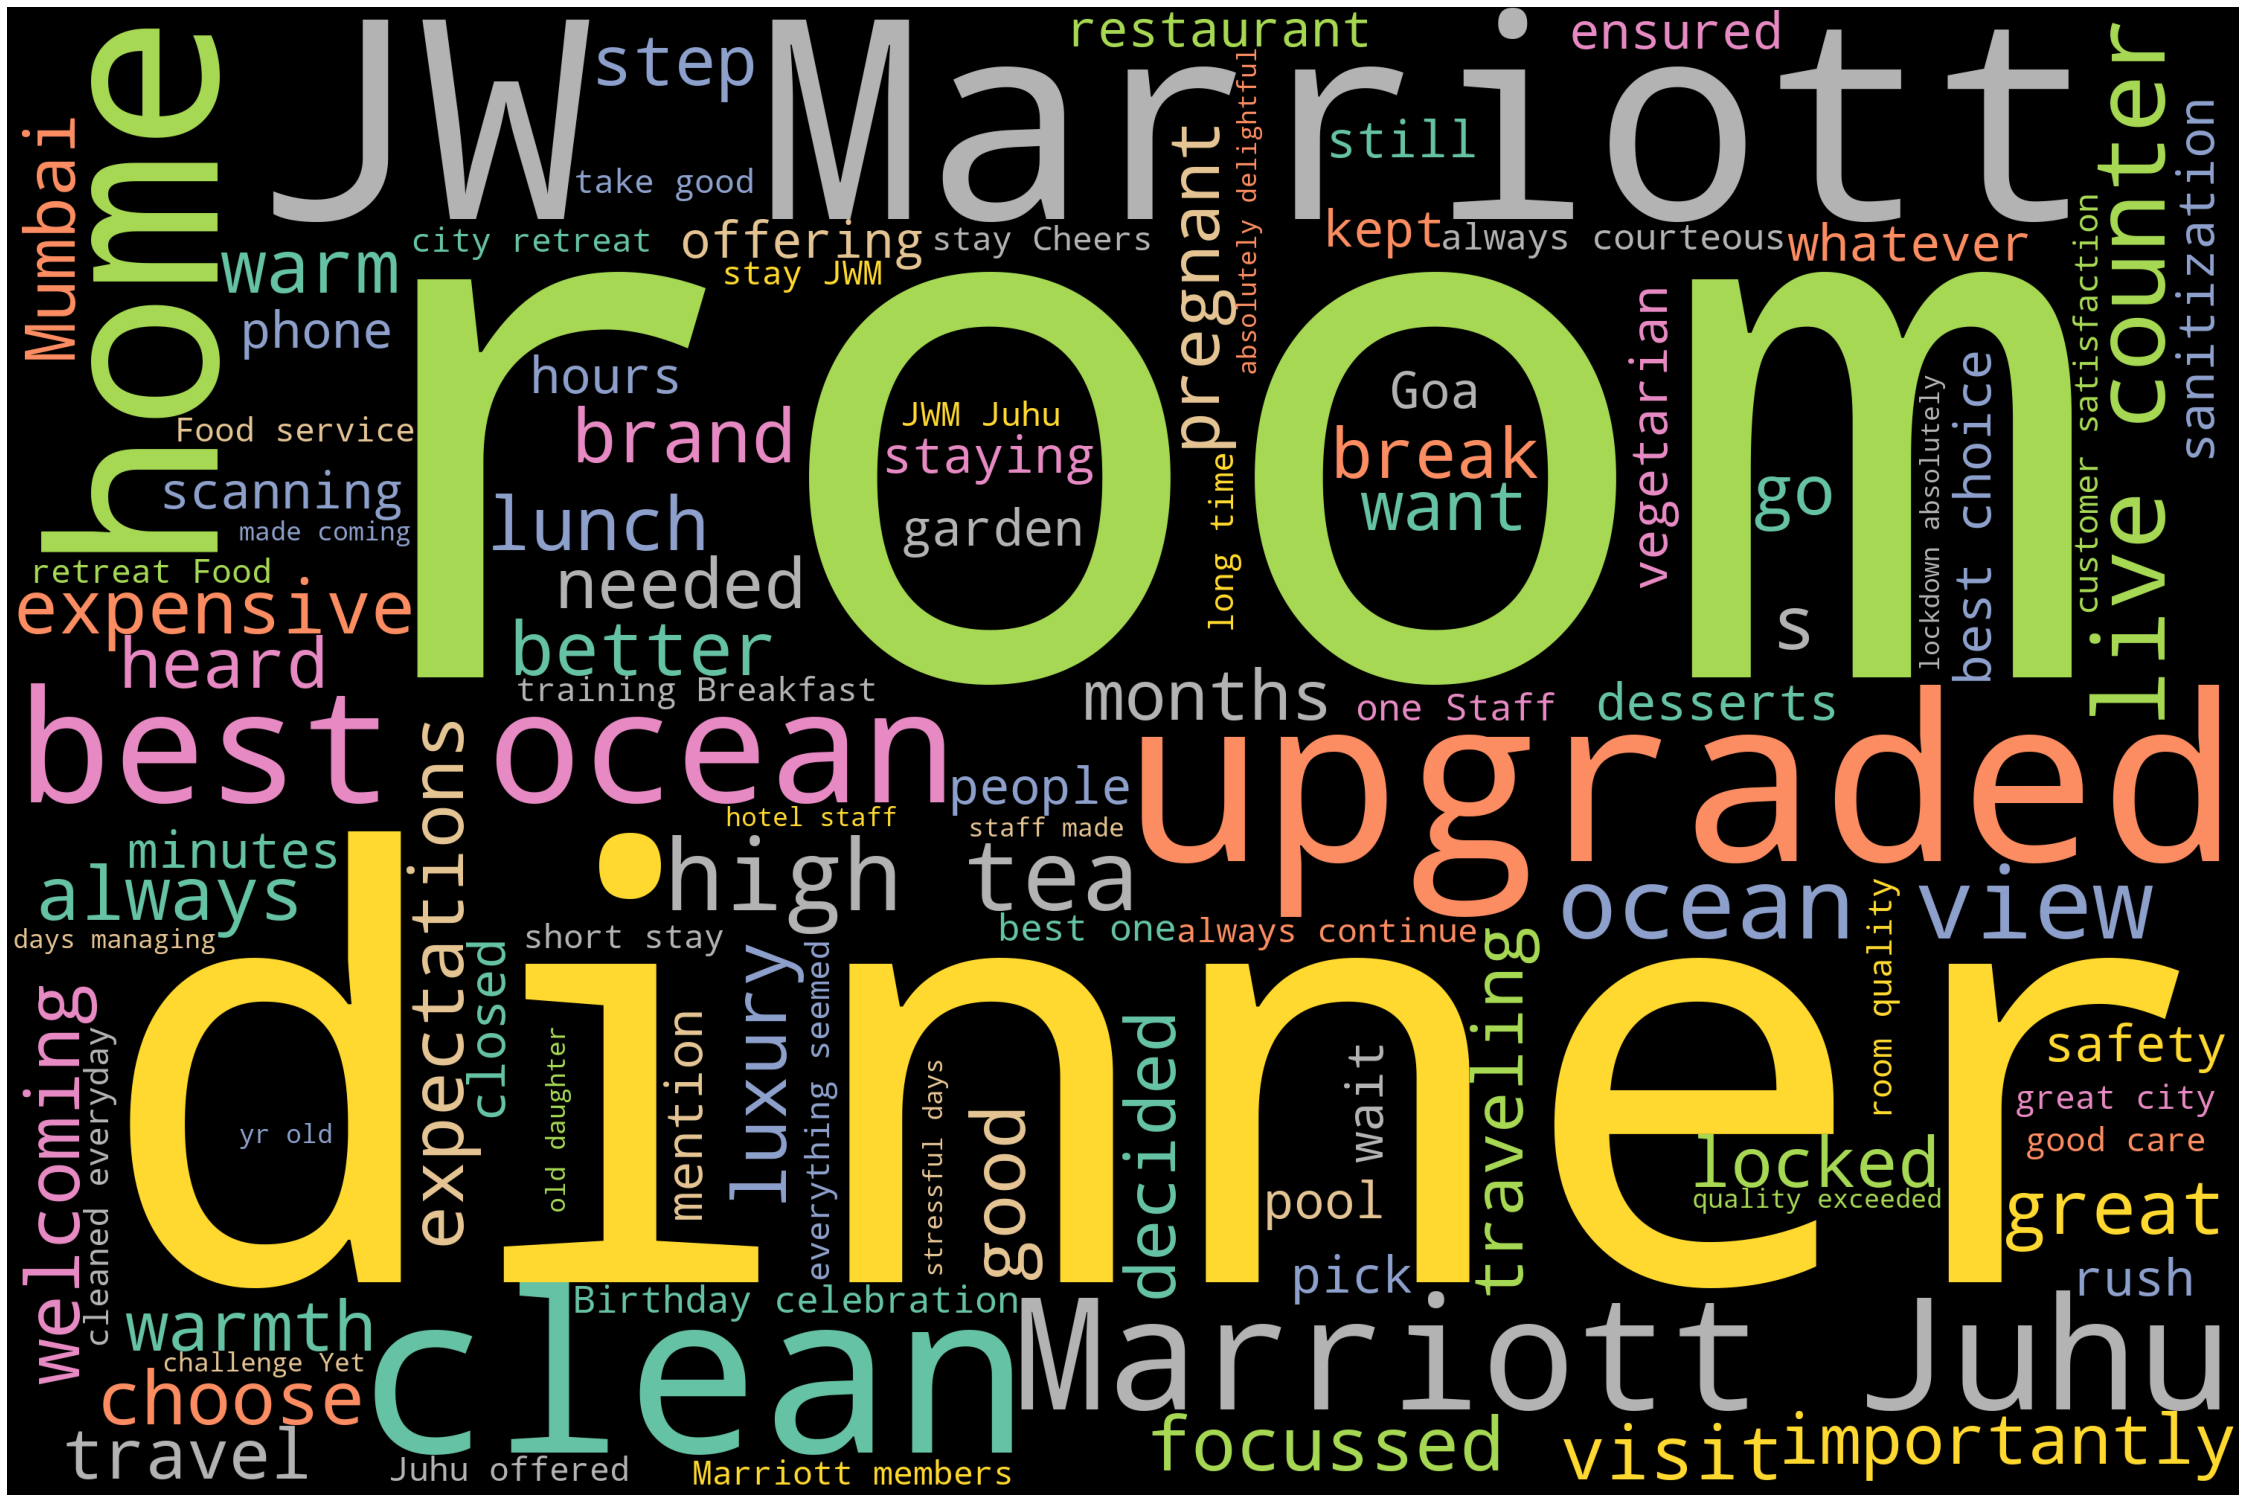

In [68]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

 # Remove the common words like "Juhu", "Marriot", "JW", "room", "Mumbai" #

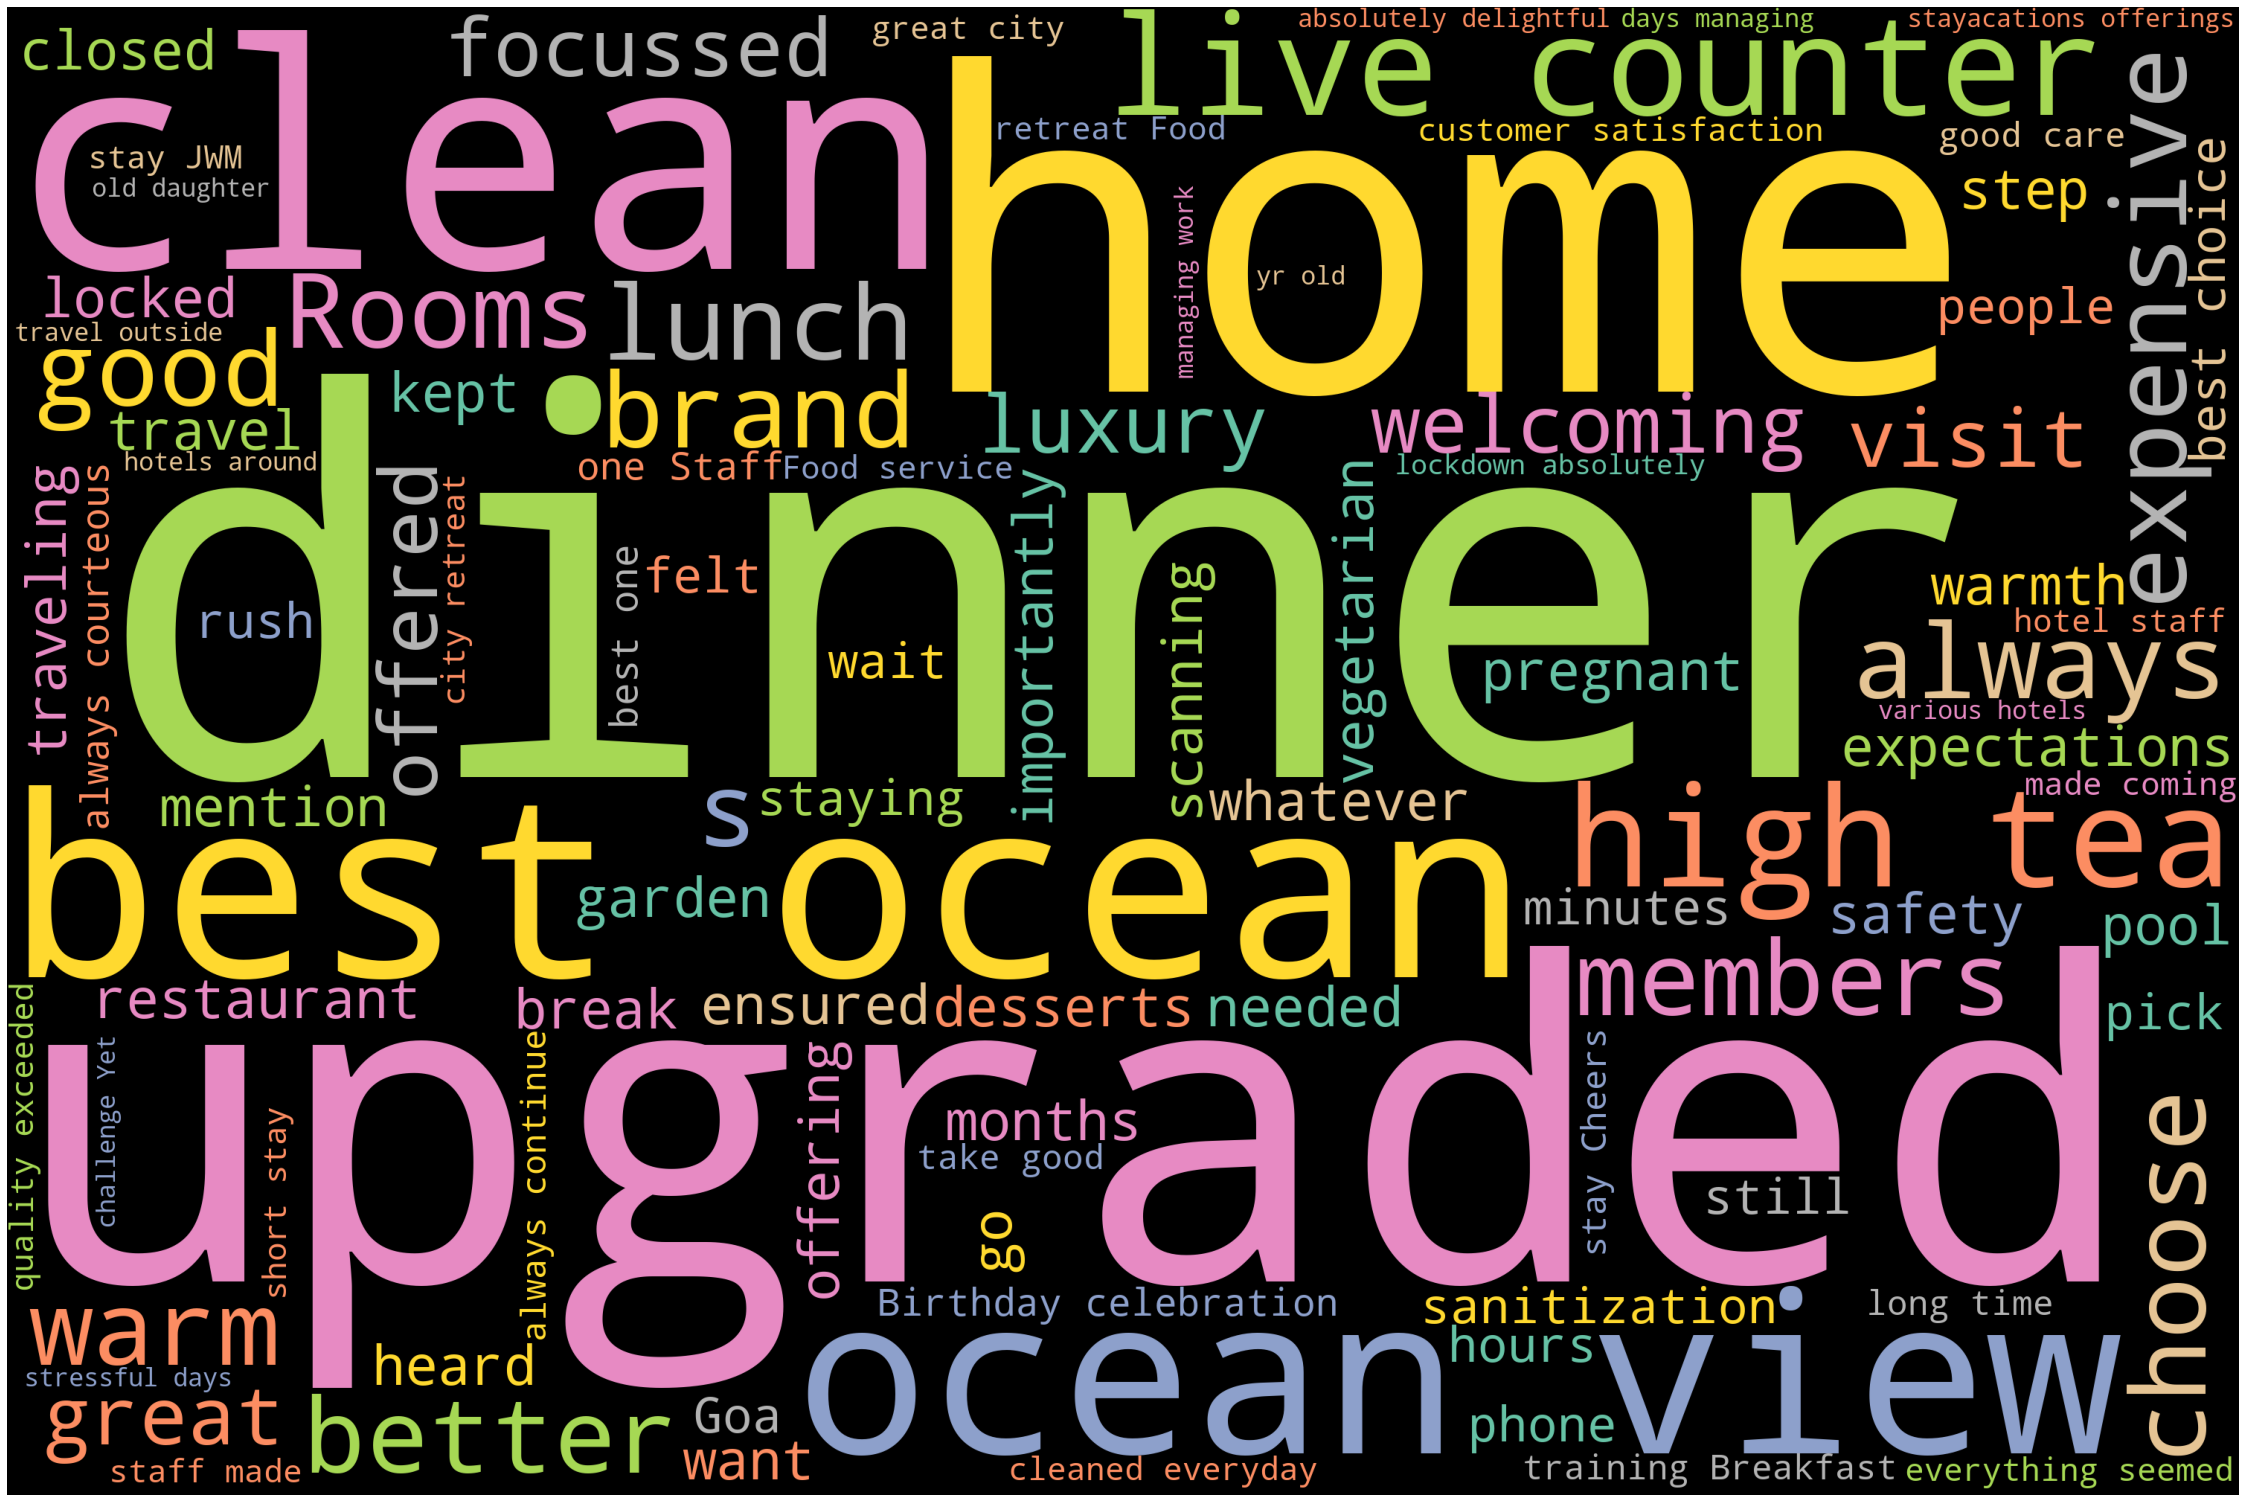

In [72]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('Juhu')
stopwords.add('Marriott')
stopwords.add('JW')
stopwords.add('room')
stopwords.add('Mumbai')
stopwords.add('decided')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [73]:
# Save image
wordcloud.to_file("wordcloud.png")